## Ejercicio de codificación #0806

#### 1. Clasificación de documentos con una red LSTM:

In [4]:
!pip install keras
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=6acb2a9b5cc16d185173021393555140553b097b9a4787b15817491cdfc0c7e2
  Stored in directory: c:\users\andrea\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


In [8]:
import pandas as pd
import numpy as np
import warnings    
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets.reuters import load_data, get_word_index       # Datos de noticias de Reuters. 
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')                  # Desactivar las advertencias
%matplotlib inline

#### 1.1. Leer los datos:

In [2]:
n_words = 1000                                        # Tamaño del vocabulario.
(X_train, y_train), (X_test, y_test) = load_data(num_words = n_words, test_split = 0.3)
n_train_size = X_train.shape[0]

In [3]:
# Comprobar las formas.print("-"*50)
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("-"*50)
print("Test data X shape: {}".format(X_test.shape))
print("Test data y shape: {}".format(y_test.shape))
print("-"*50)

Training data X shape: (7859,)
Training data y shape: (7859,)
--------------------------------------------------
Test data X shape: (3369,)
Test data y shape: (3369,)
--------------------------------------------------


#### 1.2. Explorar los datos:

In [4]:
# Número de valores únicos de y = Número de categorías de cables de noticias.
n_cat = pd.Series(y_train).nunique()
n_cat

46

In [5]:
# Imprimir una observación (documento) contenida en X.
# Está codificado como números enteros (índices).
print(X_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [6]:
# Revisar la longitud de los primeros 100 documentos.
# Notamos que la longitud no es uniforme.
print([len(a) for a in X_train[0:100]])

[87, 56, 139, 224, 101, 116, 100, 100, 82, 106, 31, 59, 65, 316, 527, 76, 114, 17, 91, 77, 231, 108, 83, 29, 95, 110, 23, 373, 114, 354, 133, 222, 571, 155, 83, 208, 170, 269, 74, 19, 23, 78, 21, 377, 104, 299, 89, 56, 94, 139, 118, 36, 137, 107, 83, 66, 70, 112, 88, 51, 83, 123, 17, 185, 84, 52, 102, 73, 106, 486, 107, 82, 263, 172, 491, 190, 143, 62, 26, 88, 114, 38, 85, 112, 793, 104, 25, 21, 101, 28, 25, 81, 135, 73, 62, 18, 90, 266, 91, 64]


In [7]:
# Descargar el diccionario para traducir los índices.
my_dict = get_word_index(path='reuters_word_index.json')

In [8]:
# Para ver el diccionario.
# my_dict

In [9]:
# Cambiar la 'clave' y el 'valor'.
my_dict_inv = {v:k for k,v in my_dict.items()}

In [10]:
# Traducir cada documento.
i_news = 10                                        # Número de documento que se puede cambiar a voluntad.
news = list(pd.Series(X_train[i_news]).apply(lambda x: my_dict_inv[x]))
print(' '.join(news))

the federal gain only growth lt they meeting year reuter company did year an they of of reuter company of of 1987 had of of reuter had profits of pct dlrs


#### 1.3. Preprocesamiento de datos:

In [11]:
# Relleno: las longitudes de los cables de noticias coinciden uniformemente con maxlen.
# Cortar si es más largo que maxlen y rellenar con 0 si es más corto que maxlen.
X_train = sequence.pad_sequences(X_train, maxlen = 100)
X_test = sequence.pad_sequences(X_test, maxlen = 100)

In [12]:
# Aplicar codificación one-hot a la variable y.
y = np.concatenate([y_train,y_test],axis=0)
y = to_categorical(y,46)
y_train = y[:n_train_size,:]
y_test = y[n_train_size:,:]

#### 1.4. Definir el modelo:

In [13]:
n_neurons = 100                   # Neuronas dentro de cada celda de memoria.
n_input = 100                     # Dimensión del espacio de incrustación.

In [14]:
# Modelo de red LSTM.
my_model = Sequential()
my_model.add(Embedding(n_words, n_input))           # n_words = tamaño de vocabulario, n_input = dimensión del espacio de inserción.
my_model.add(LSTM(units=n_neurons, return_sequences=False, input_shape=(None, n_input), activation='tanh'))
my_model.add(Dense(n_cat, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
# VResumen.
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         100000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 46)                4646      
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


#### 1.5. Definir el optimizador y compliar:

In [16]:
n_epochs = 20                      # Número de épocas.
batch_size = 20                    # Tamaño de cada lote.
learn_rate = 0.001                 # Ratio de aprendizaje.  

In [17]:
# Optimizar y compliar.
my_optimizer=Adam(lr=learn_rate)
my_model.compile(loss = "categorical_crossentropy", optimizer = my_optimizer, metrics=["accuracy"])

#### 1.6. Entrenar el modelo y visualizar la historia:

In [18]:
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split=0.2, verbose = 1)

Instructions for updating:
Use tf.cast instead.
Train on 6287 samples, validate on 1572 samples
Epoch 1/20
6287/6287 [==============================] - 27s 4ms/step - loss: 2.2892 - acc: 0.4142 - val_loss: 1.8810 - val_acc: 0.5121
Epoch 2/20
6287/6287 [==============================] - 26s 4ms/step - loss: 1.8761 - acc: 0.5252 - val_loss: 1.7647 - val_acc: 0.5585
Epoch 3/20
6287/6287 [==============================] - 25s 4ms/step - loss: 1.7216 - acc: 0.5565 - val_loss: 1.6683 - val_acc: 0.5700
Epoch 4/20
6287/6287 [==============================] - 27s 4ms/step - loss: 1.6236 - acc: 0.5861 - val_loss: 1.5601 - val_acc: 0.6043
Epoch 5/20
6287/6287 [==============================] - 26s 4ms/step - loss: 1.5231 - acc: 0.6135 - val_loss: 1.5416 - val_acc: 0.6132
Epoch 6/20
6287/6287 [==============================] - 25s 4ms/step - loss: 1.4115 - acc: 0.6440 - val_loss: 1.4454 - val_acc: 0.6298
Epoch 7/20
6287/6287 [==============================] - 26s 4ms/step - loss: 1.3365 - acc: 0.6

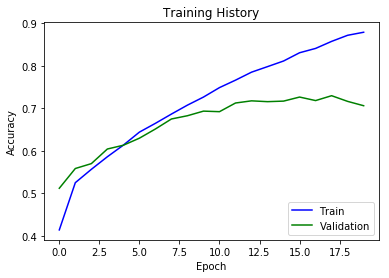

In [20]:
plt.plot(my_summary.history['acc'], c="b")
plt.plot(my_summary.history['val_acc'], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

#### 1.7. Pruebas: 

In [21]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]    
print("Test Accuracy : {}".format(np.round(ACC,3)))

Test Accuracy : 0.696
